In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from google.colab.patches import cv2_imshow

In [2]:
img_tr = cv2.imread('train.jpg')
img_ts1 = cv2.imread('test1.png')
img_ts2 = cv2.imread('test2.png')
img_ts3 = cv2.imread('test3.png')

(-0.5, 63.5, 63.5, -0.5)

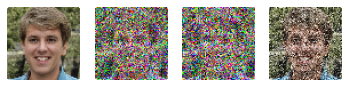

In [3]:
img_tr = cv2.resize(img_tr,(64,64))
img_tr = cv2.cvtColor(img_tr, cv2.COLOR_BGR2RGB)
img_tr = np.array(img_tr)
img_ts1 = cv2.resize(img_ts1,(64,64))
img_ts1 = cv2.cvtColor(img_ts1, cv2.COLOR_BGR2RGB)
img_ts1 = np.array(img_ts1)
img_ts2 = cv2.resize(img_ts2,(64,64))
img_ts2 = cv2.cvtColor(img_ts2, cv2.COLOR_BGR2RGB)
img_ts2 = np.array(img_ts2)
img_ts3 = cv2.resize(img_ts3,(64,64))
img_ts3 = cv2.cvtColor(img_ts3, cv2.COLOR_BGR2RGB)
img_ts3 = np.array(img_ts3)
plt.subplot(1,4,1)
plt.imshow(img_tr)
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(img_ts1)
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img_ts2)
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_ts3)
plt.axis('off')

In [4]:
img_tr_gray = np.mean(img_tr,axis=2)
img_ts1_gray = np.mean(img_ts1,axis=2)
img_ts2_gray = np.mean(img_ts2,axis=2)
img_ts3_gray = np.mean(img_ts3,axis=2)

(-0.5, 63.5, 63.5, -0.5)

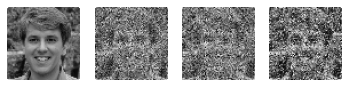

In [5]:
plt.subplot(1,4,1)
plt.imshow(img_tr_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(img_ts1_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img_ts2_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_ts3_gray, cmap='gray')
plt.axis('off')

In [6]:
def bipolar(image):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i,j] >= 110:
        image[i,j] = 1
      else:
        image[i,j] = -1
  return image

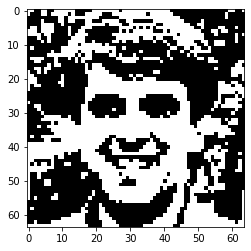

In [7]:
img_tr_bipolar = np.zeros((64,64))
X = img_tr_gray.copy()
img_tr_bipolar = bipolar(X)
plt.imshow(img_tr_bipolar, cmap='gray')

In [8]:
X_tr = img_tr_gray
X_ts1 = img_ts1_gray
X_ts2 = img_ts2_gray
X_ts3 = img_ts3_gray
img_tr_bipolar = bipolar(X_tr)
img_ts1_bipolar = bipolar(X_ts1)
img_ts2_bipolar = bipolar(X_ts2)
img_ts3_bipolar = bipolar(X_ts3)

(-0.5, 63.5, 63.5, -0.5)

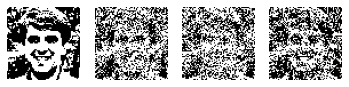

In [9]:
plt.subplot(1,4,1)
plt.imshow(img_tr_bipolar, cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(img_ts1_bipolar, cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img_ts2_bipolar, cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_ts3_bipolar, cmap='gray')
plt.axis('off')

>Part C

In [10]:
img_tr_bipolar_re = np.reshape(img_tr_bipolar, (64*64, 1))

In [11]:
W = np.zeros((64,64))

In [12]:
W = np.dot(img_tr_bipolar_re,img_tr_bipolar_re.T)

In [13]:
W - np.eye(64*64,64*64)

array([[ 0.,  1., -1., ...,  1.,  1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [-1., -1.,  0., ..., -1., -1., -1.],
       ...,
       [ 1.,  1., -1., ...,  0.,  1.,  1.],
       [ 1.,  1., -1., ...,  1.,  0.,  1.],
       [ 1.,  1., -1., ...,  1.,  1.,  0.]])

In [14]:
img_ts1_bipolar_re = np.reshape(img_ts1_bipolar, (64*64, 1))
img_ts2_bipolar_re = np.reshape(img_ts2_bipolar, (64*64, 1))
img_ts3_bipolar_re = np.reshape(img_ts3_bipolar, (64*64, 1))

In [41]:
X = img_tr_bipolar_re.copy()
Y1 = img_ts1_bipolar_re.copy()
Y2 = img_ts2_bipolar_re.copy()
Y3 = img_ts3_bipolar_re.copy()
t=0
for i in range(4096):
  Y_in1 = np.dot(Y1.T, W[:,i].reshape(4096,1)) + X[i]
  if Y_in1 > 0:
    Y1[i] = 1
  else:
    Y1[i] = -1
  Y_in2 = np.dot(Y2.T, W[:,i].reshape(4096,1)) + X[i]
  if Y_in2 > 0:
    Y2[i] = 1
  else:
    Y2[i] = -1
  Y_in3 = np.dot(Y3.T, W[:,i].reshape(4096,1)) + X[i]
  if Y_in3 > 0:
    Y3[i] = 1
  else:
    Y3[i] = -1
  

In [42]:
rec_ts1 = Y1.reshape(64,64)
rec_ts2 = Y2.reshape(64,64)
rec_ts3 = Y3.reshape(64,64)

(-0.5, 63.5, 63.5, -0.5)

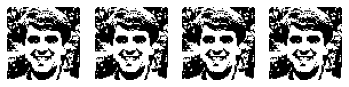

In [43]:
plt.subplot(1,4,1)
plt.imshow(img_tr_bipolar, cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(rec_ts1, cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(rec_ts2, cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(rec_ts3, cmap='gray')
plt.axis('off')